In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
data = pd.read_csv(
    "spam.csv",
    sep="\t",
    header=None,
    names=["label", "message"]
)

data.columns = ['label','text']

# Convert labels
data['label'] = data['label'].map({'ham':0, 'spam':1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data['text'], data['label'], test_size=0.2, random_state=42
)

# TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.97847533632287
Precision: 1.0
Recall: 0.8389261744966443
F1-score: 0.9124087591240876


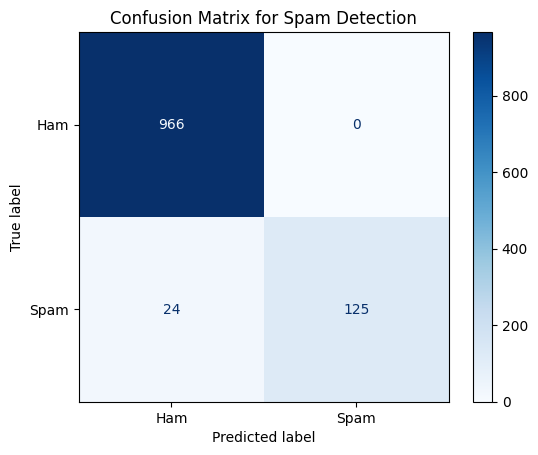

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Ham", "Spam"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Spam Detection")
plt.show()

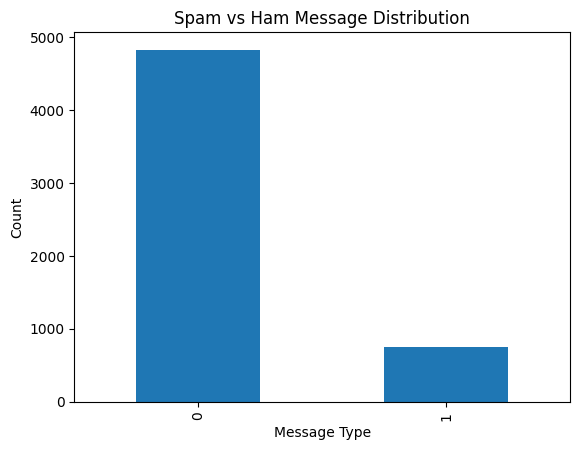

In [10]:
import pandas as pd

data['label'].value_counts().plot(kind='bar')
plt.title("Spam vs Ham Message Distribution")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()